In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data= pd.read_csv("delivery_time.csv")

In [2]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


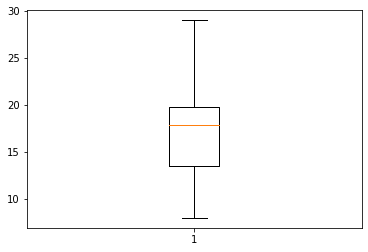

In [7]:
plt.boxplot(data['Delivery Time'])
data.describe()

In [8]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

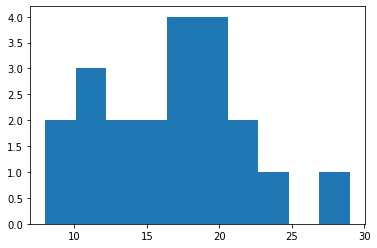

In [10]:
plt.hist(data['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

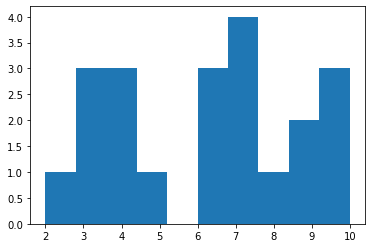

In [11]:
plt.hist(data['Sorting Time'])

Text(0.5, 1.0, 'boxplot of sorting time')

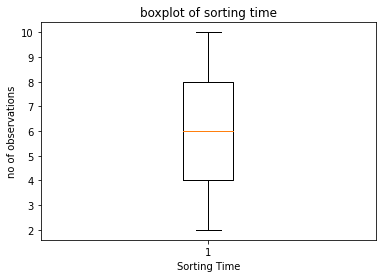

In [13]:
import seaborn as sns
plt.boxplot(data['Sorting Time'])
plt.xlabel('Sorting Time')
plt.ylabel("no of observations")
plt.title('boxplot of sorting time')

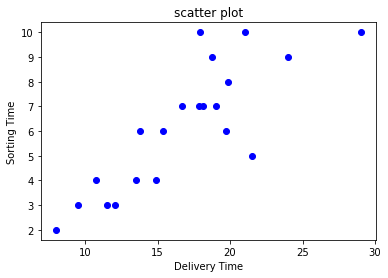

In [15]:
plt.plot(data['Delivery Time'],data['Sorting Time'],"bo")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("scatter plot")
plt.show()

In [18]:
data['Sorting Time'].corr(data['Delivery Time'])

0.8259972607955325

In [22]:
data = data.rename({'Sorting Time':'sortingtime','Delivery Time':'deliverytime'},axis=1)
data

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
import statsmodels.formula.api as smf
model = smf.ols("sortingtime~deliverytime",data=data).fit()


In [25]:
pred = model.params

In [26]:
print(model.tvalues, '\n', model.pvalues)

Intercept      -0.667290
deliverytime    6.387447
dtype: float64 
 Intercept       0.512611
deliverytime    0.000004
dtype: float64


In [27]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sortingtime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        09:28:21   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
deliverytime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [30]:
#prediction
new_data=pd.Series ([20,30])
data_pred=pd.DataFrame(new_data, columns=['deliverytime'])
data_pred

,deliverytime
0,20
1,30


In [31]:
model.predict(data_pred)

0     7.518199
1    11.655635
dtype: float64